# Creating images with numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# creating a grey image
grey = np.full((512,512),128,dtype = np.uint8)
# creating rgb image
rgb = np.zeros((512,512,3),dtype = np.uint8)
rgb[:,:,1] = 255
green = rgb
rgb[:,:,0] = 255
gred = rgb
cv2.imshow("Greyscale",grey)
cv2.waitKey(0)              # Wait indefinitely until a key is pressed
cv2.destroyAllWindows()
cv2.imshow("RGB_image",green)
cv2.waitKey(0)             
cv2.destroyAllWindows()

Saving the images and reading the image from the disk using cv2

In [3]:
cv2.imwrite("/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/grey.png",grey)

True

# Handling DICOM (.dcm) images

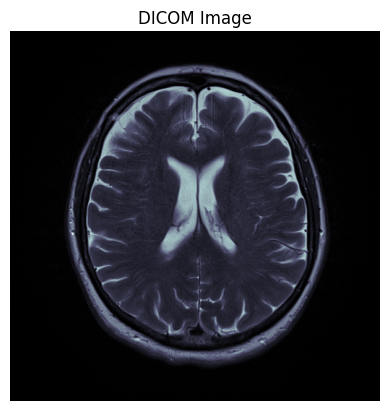

In [4]:
import pydicom

# Load the DICOM file
dicom_file = pydicom.dcmread('/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/Head_MRI.dcm')

# Access the pixel data
mri_img = dicom_file.pixel_array

# Display the image
plt.imshow(mri_img, cmap=plt.cm.bone)
plt.title("DICOM Image")
plt.axis('off')
plt.show()


# Handling RGB images

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

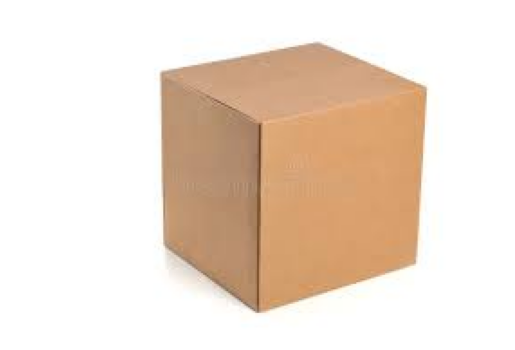

In [5]:
import matplotlib.image as mpimg
# using mpimg for reading the rgb image
img= mpimg.imread("/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/box.jpg")
plt.imshow(img)
plt.axis('off')


View individual channels of the rgb image

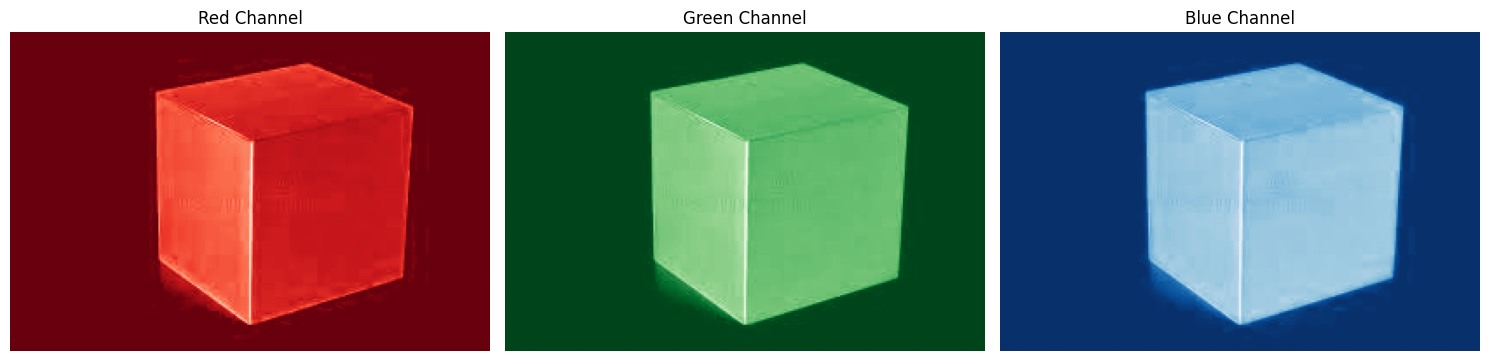

Image red and blue channels are not the same


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming `img` is your loaded RGB image
red_img = img[:, :, 0]
green_img = img[:, :, 1]
blue_img = img[:, :, 2]

# Create a figure with a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the red channel
axes[0].imshow(red_img, cmap='Reds')
axes[0].set_title("Red Channel")
axes[0].axis('off')

# Display the green channel
axes[1].imshow(green_img, cmap='Greens')
axes[1].set_title("Green Channel")
axes[1].axis('off')

# Display the blue channel
axes[2].imshow(blue_img, cmap='Blues')
axes[2].set_title("Blue Channel")
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

# Compare the red and blue channels
if np.array_equal(red_img, blue_img):
    print("Image red and blue channels are the same")
else:
    print("Image red and blue channels are not the same")


Convert the images (rgb) to greyscale

NameError: name 'grey_img_avg' is not defined

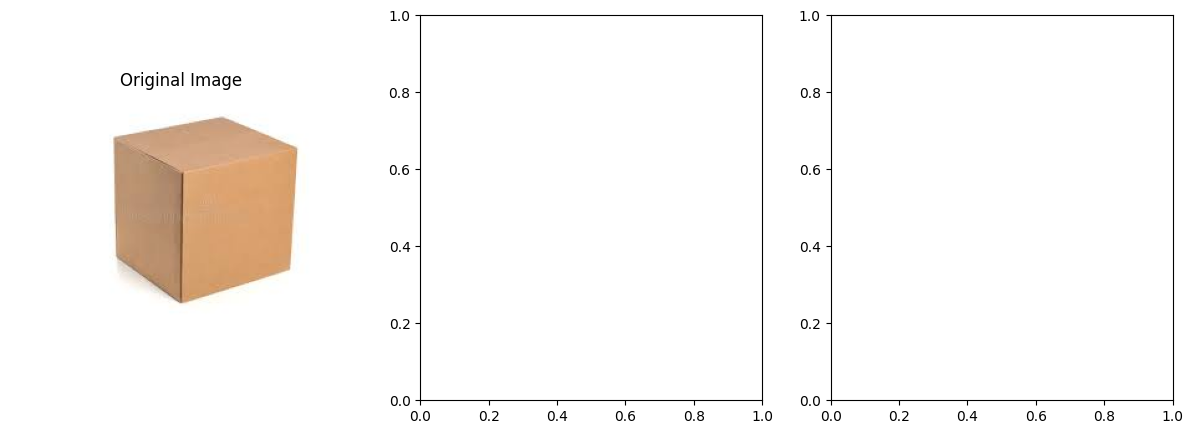

In [7]:
def img2grey(image, type = "lum"):
    row, col, ch = image.shape
    img = np.zeros((row,col),dtype = np.uint8)
    if ch == 3: #handling rgb images
        # average value method 
        if type == "avg":
            r, g, b = image[:,:,0], image[:,:,1],image[:,:,2]
            for i in range(0,row):
                for j in range(0,col):
                    a = int(r[i,j])+int(g[i,j])+int(b[i,j])
                    img[i,j] = a/3
        # weighted or luminous value method
        if type == "lum": 
            r, g, b = image[:,:,0], image[:,:,1],image[:,:,2]
            for i in range(0,row):
                for j in range(0,col):
                    a = 0.299*int(r[i,j])+0.587*int(g[i,j])+0.114*int(b[i,j]) # Grayscale Value = 0.299 * Red + 0.587 * Green + 0.114 * Blue.
                    img[i,j] = a/3
    else:
        img  = image
    return img 

# Create a figure with a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Display the original image
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Display the Averaged Greyscale image
axes[1].imshow(grey_img_avg, cmap='gray')
axes[1].set_title("Averaged Grey Image ")
axes[1].axis('off')

# Display the blue channel
axes[2].imshow(grey_img_weighted, cmap='gray')
axes[2].set_title("Weighted Grey Image")
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()



Performing basic point operation on the greyscale image

In [ ]:
#inverting the image
def invertimg(img):
    return 255-img

# Adjust brightness
def adjust_bright(img,type = "increase",delta = 20):
    """"
    img = image matrix
    delta = pixel intensity value 
    type = if increase --> increment the intensity if reduce --> decrease the intensity value
    """
    if type == "increase":
        newimg = img + delta
    elif type == "reduce":
        newimg = img - delta
    newimg = np.clip(newimg,0,255)
    return newimg

# thresholding 
def threshold(img, th = 128):
    """
    Apply binary thresholding to an image.
    Pixels > th → 255, else → 0
    """
    newimg = np.where(img > th, 255, 0).astype(np.uint8)
    return newimg

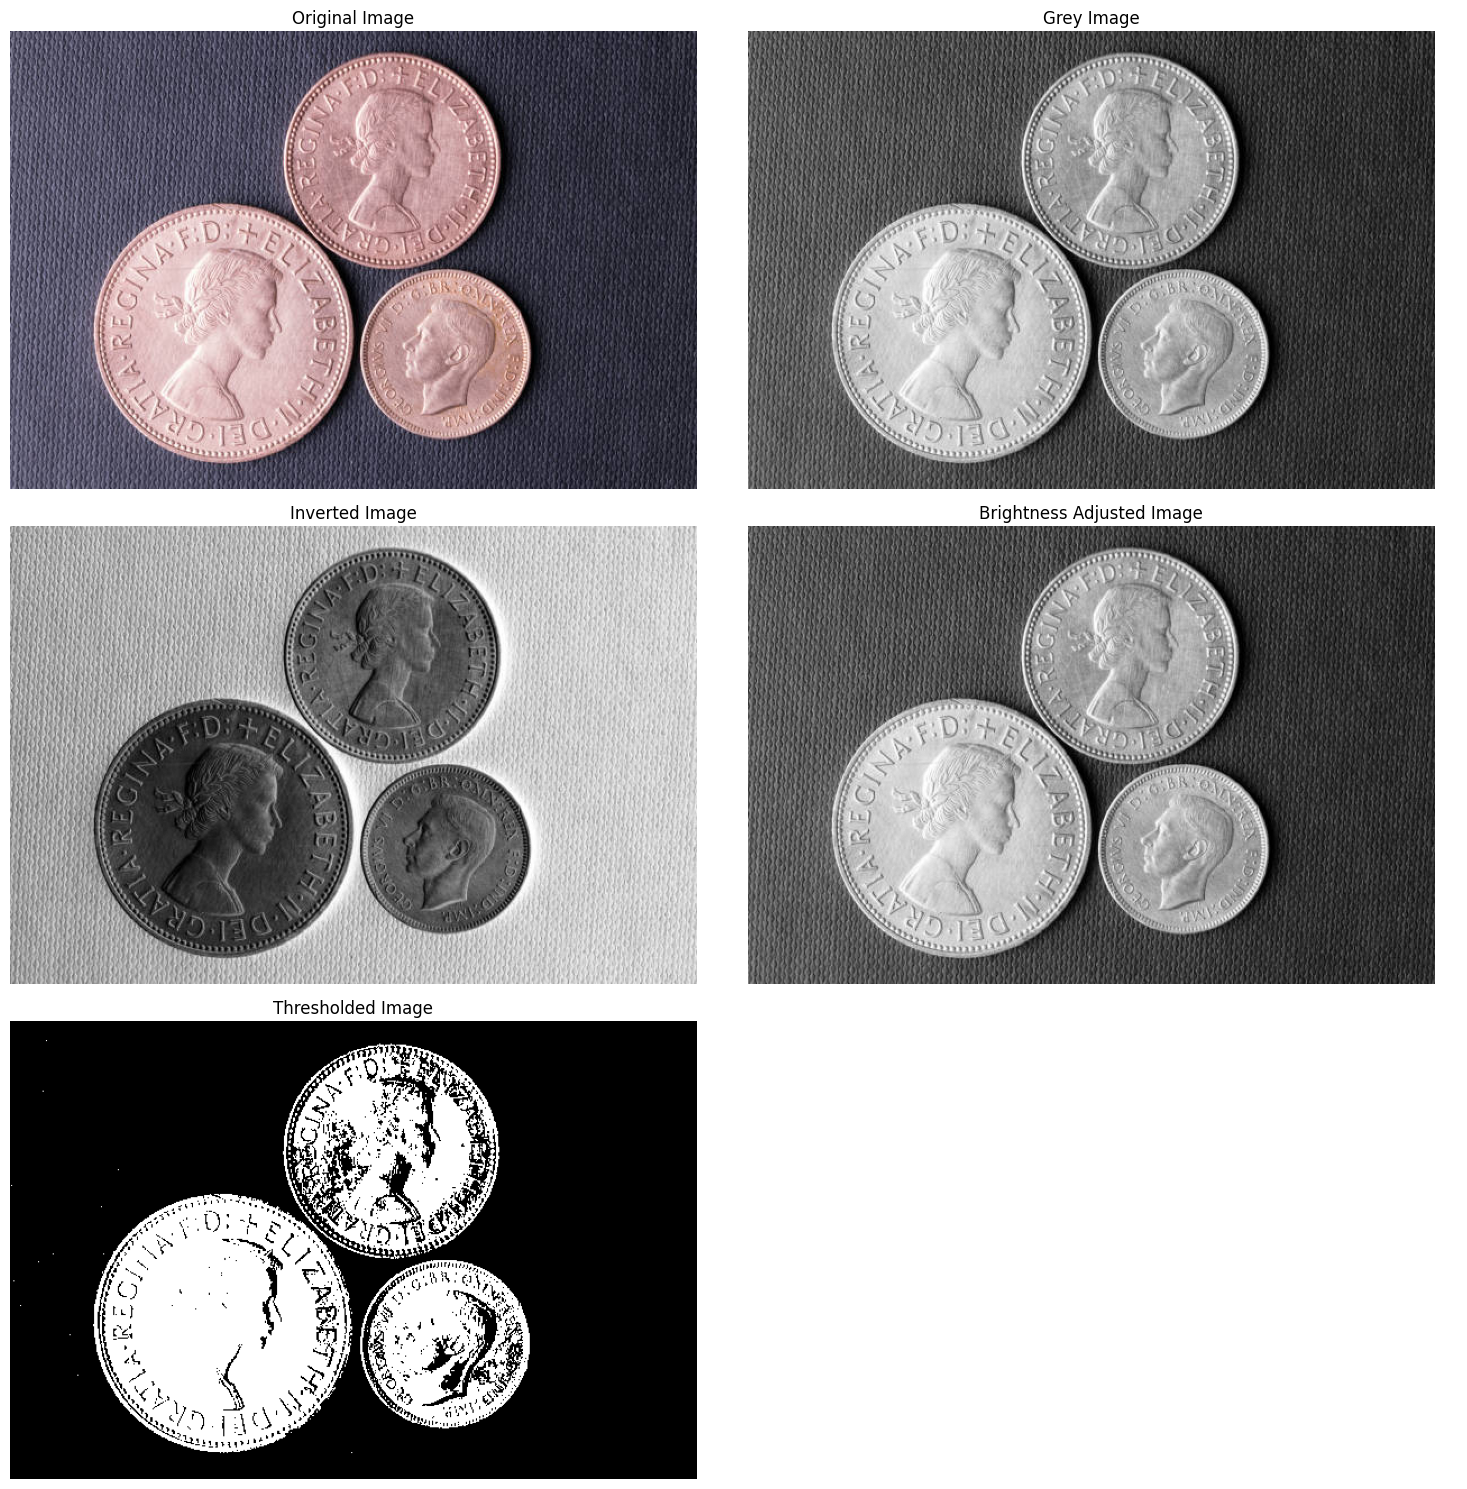

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming the necessary functions and images are defined
paisa_rgb = mpimg.imread("/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/paisa.jpg")
paisa = img2grey(paisa_rgb, type="lum")
inverted_img = invertimg(paisa)
brightimg = adjust_bright(paisa, "reduce", 255)
th_image = threshold(paisa, th=50)

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Display the original image
axes[0, 0].imshow(paisa_rgb)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Display the grey_scale image
axes[0, 1].imshow(paisa, cmap='gray')
axes[0, 1].set_title("Grey Image")
axes[0, 1].axis('off')

# Display the inverted image
axes[1, 0].imshow(inverted_img, cmap='gray')
axes[1, 0].set_title("Inverted Image")
axes[1, 0].axis('off')

# Display the brightness changed image
axes[1, 1].imshow(brightimg, cmap='gray')
axes[1, 1].set_title("Brightness Adjusted Image")
axes[1, 1].axis('off')

# Display the thresholded image
axes[2, 0].imshow(th_image, cmap='gray')
axes[2, 0].set_title("Thresholded Image")
axes[2, 0].axis('off')

# You can leave the last subplot empty or hide it
axes[2, 1].axis('off')

# Show the plot
plt.tight_layout()
plt.show()


Adding and subtracting two images

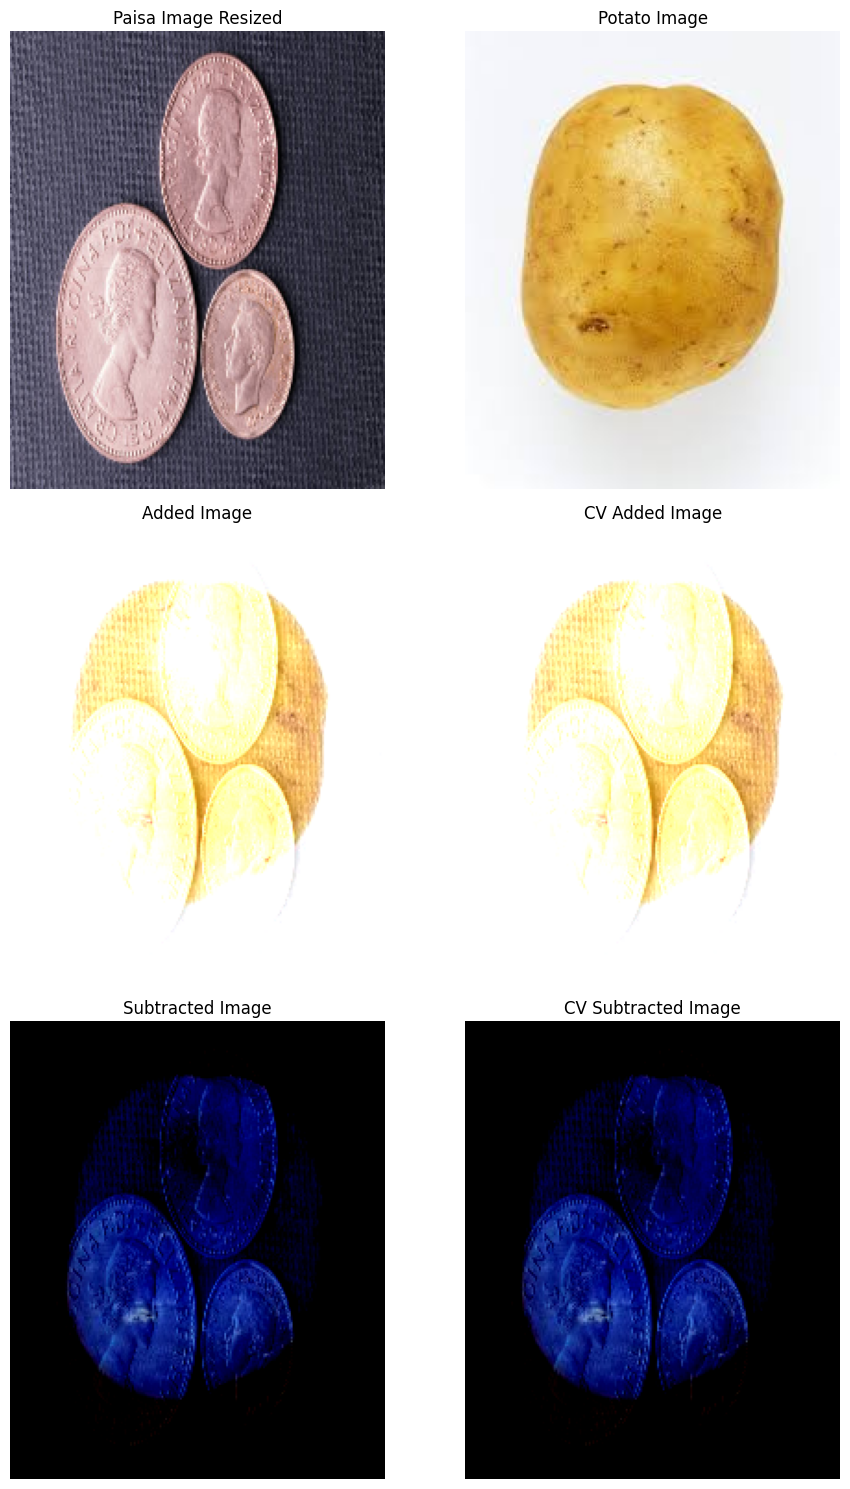

In [ ]:
# read the potato image
potato = mpimg.imread("/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/potato.jpg")
# paisa_rgb array of paisa image
#resize the potato image to match the size of the pisa image [here we use opencv as resizing using numpy doesn't produce good results for the image]
paisa_resized = cv2.resize(paisa_rgb, (potato.shape[1], potato.shape[0]))

#lets add potato and paisa
added_img= paisa_resized.astype(np.int16)+ potato.astype(np.int16)
added_img = np.clip(added_img, 0,255).astype(np.uint8)
add_cv2 = cv2.add(paisa_resized, potato )
# lets subtract potato form paisa
sub_img = paisa_resized.astype(np.int16)-potato.astype(np.int16)
sub_img = np.clip(sub_img, 0,255).astype(np.uint8)
sub_cv2 = cv2.subtract(paisa_resized,potato)

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# Display the resized paisa image
axes[0, 0].imshow(paisa_resized)
axes[0, 0].set_title("Paisa Image Resized")
axes[0, 0].axis('off')

# Display the potato image
axes[0, 1].imshow(potato)
axes[0, 1].set_title("Potato Image")
axes[0, 1].axis('off')

# Display the mannually added image
axes[1, 0].imshow(added_img)
axes[1, 0].set_title("Added Image")
axes[1, 0].axis('off')

# Display the cv added image
axes[1, 1].imshow(add_cv2)
axes[1, 1].set_title("CV Added Image")
axes[1, 1].axis('off')

# Display the Subtracted image
axes[2, 0].imshow(sub_img)
axes[2, 0].set_title("Subtracted Image")
axes[2, 0].axis('off')

# Display the cv subtracted image
axes[2, 1].imshow(sub_cv2)
axes[2, 1].set_title("CV Subtracted Image")
axes[2, 1].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

Bitwise operation on images

In [ ]:
# Load two images
image1 = paisa_resized
image2 = potato

# Bitwise AND
result_and = cv2.bitwise_and(image1, image2)

# Bitwise OR
result_or = cv2.bitwise_or(image1, image2)

# Bitwise XOR
result_xor = cv2.bitwise_xor(image1, image2)

# Bitwise NOT
result_not = cv2.bitwise_not(image1)

# Display the results
cv2.imshow('Bitwise AND', result_and)
cv2.imshow('Bitwise OR', result_or)
cv2.imshow('Bitwise XOR', result_xor)
cv2.imshow('Bitwise NOT', result_not)

cv2.waitKey(0)
cv2.destroyAllWindows()
